<a href="https://colab.research.google.com/github/MikeSirya/Master-Thesis/blob/main/LSTM_HoldOut_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import os
import numpy as np

import  tensorflow.keras.losses

In [ ]:
# Specify the path to the CSV file with station codes
csv_path = "/content/SantMateu21.csv"

df = pd.read_csv(csv_path)
df

,Timestamp,Sant Mateu
0,01/01/2021 00:00,2.60
1,01/01/2021 00:10,2.35
2,01/01/2021 00:20,1.80
3,01/01/2021 00:30,1.80
4,01/01/2021 00:40,2.55
...,...,...
21739,31/05/2021 23:10,15.95
21740,31/05/2021 23:20,15.75
21741,31/05/2021 23:30,15.60
21742,31/05/2021 23:40,15.25


In [ ]:
df.index = pd.to_datetime(df['Timestamp'], format= "%d/%m/%Y %H:%M")
df[:5]

,Timestamp,Sant Mateu
Timestamp,,
2021-01-01 00:00:00,01/01/2021 00:00,2.60
2021-01-01 00:10:00,01/01/2021 00:10,2.35
2021-01-01 00:20:00,01/01/2021 00:20,1.80
2021-01-01 00:30:00,01/01/2021 00:30,1.80
2021-01-01 00:40:00,01/01/2021 00:40,2.55


In [ ]:
df.tail()

,Timestamp,Sant Mateu
Timestamp,,
2021-05-31 23:10:00,31/05/2021 23:10,15.95
2021-05-31 23:20:00,31/05/2021 23:20,15.75
2021-05-31 23:30:00,31/05/2021 23:30,15.60
2021-05-31 23:40:00,31/05/2021 23:40,15.25
2021-05-31 23:50:00,31/05/2021 23:50,15.15


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
num_rows = len(df)
print("Number of rows:", num_rows)


Number of rows: 21744


<Axes: xlabel='Timestamp'>

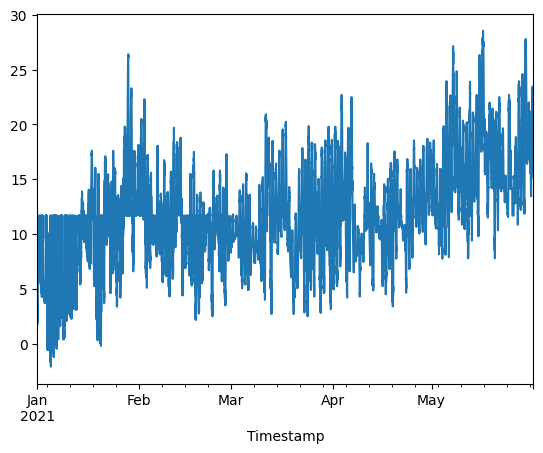

In [ ]:
temp = df['Sant Mateu']
temp.plot()

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((21739, 5, 1), (21739,))

In [ ]:
X_train1, y_train1 = X1[:6000], y1[:6000]
X_val1, y_val1 = X1[6000:6500], y1[6000:6500]
X_test1, y_test1 = X1[6500:15000], y1[6500:15000]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((6000, 5, 1), (6000,), (500, 5, 1), (500,), (8500, 5, 1), (8500,))

In [ ]:
from tensorflow.keras import losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam



model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
188/188 [==============================] - 8s 28ms/step - loss: 84.1210 - root_mean_squared_error: 9.1718 - val_loss: 67.5059 - val_root_mean_squared_error: 8.2162
Epoch 2/10
188/188 [==============================] - 5s 25ms/step - loss: 36.6666 - root_mean_squared_error: 6.0553 - val_loss: 22.7207 - val_root_mean_squared_error: 4.7666
Epoch 3/10
188/188 [==============================] - 5s 28ms/step - loss: 15.9687 - root_mean_squared_error: 3.9961 - val_loss: 8.6549 - val_root_mean_squared_error: 2.9419
Epoch 4/10
188/188 [==============================] - 4s 23ms/step - loss: 7.7014 - root_mean_squared_error: 2.7751 - val_loss: 3.2829 - val_root_mean_squared_error: 1.8119
Epoch 5/10
188/188 [==============================] - 5s 27ms/step - loss: 4.4514 - root_mean_squared_error: 2.1098 - val_loss: 1.6749 - val_root_mean_squared_error: 1.2942
Epoch 6/10
188/188 [==============================] - 5s 26ms/step - loss: 3.1838 - root_mean_squared_error: 1.7843 - val_loss: 1.

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
train_predictions = model1.predict(X_train1).flatten()
rmse = sqrt(mean_squared_error(y_train1, train_predictions))
train_results = pd.DataFrame(data={'Actuals':y_train1,'Train Predictions':train_predictions, 'RMSE': [rmse] * len(y_train1)})
train_results

188/188 [==============================] - 1s 2ms/step


,Actuals,Train Predictions,RMSE
0,3.40,2.139913,1.356193
1,3.60,2.917495,1.356193
2,3.20,3.682830,1.356193
3,2.70,3.754696,1.356193
4,2.50,3.225948,1.356193
...,...,...,...
5995,18.20,17.605545,1.356193
5996,17.85,17.630974,1.356193
5997,17.70,17.578629,1.356193
5998,18.10,17.494177,1.356193


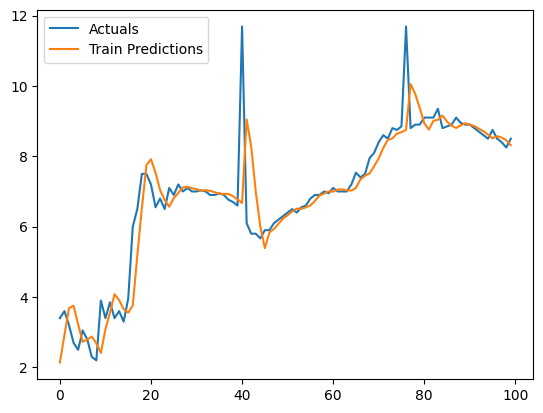

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Actuals'][:100], label='Actuals')
plt.plot(train_results['Train Predictions'][:100], label='Train Predictions')
plt.legend()
plt.title('HOLDOUT LSTM MODEL 1')


In [ ]:
val_predictions = model1.predict(X_val1).flatten()
rmse = sqrt(mean_squared_error(y_val1, val_predictions))
val_results = pd.DataFrame(data={ 'Actuals':y_val1, 'Val Predictions':val_predictions, 'RMSE': [rmse] * len(y_val1)})
val_results

16/16 [==============================] - 0s 2ms/step


,Actuals,Val Predictions,RMSE
0,17.60,17.456842,0.929239
1,17.30,17.402000,0.929239
2,17.15,17.291504,0.929239
3,16.80,17.165703,0.929239
4,16.80,16.998672,0.929239
...,...,...,...
495,7.15,7.179505,0.929239
496,7.20,7.184225,0.929239
497,7.10,7.200140,0.929239
498,7.20,7.156591,0.929239


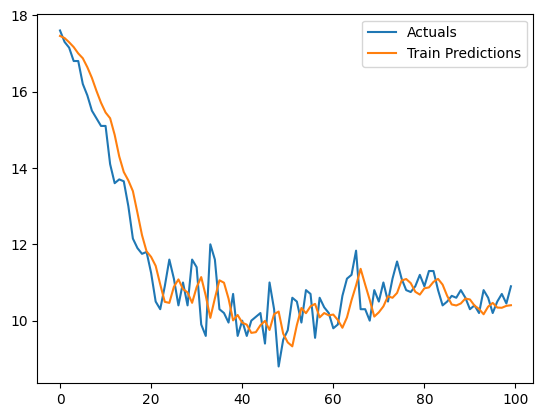

In [ ]:
plt.plot(val_results['Actuals'][:100], label='Actuals')
plt.plot(val_results['Val Predictions'][:100],label='Train Predictions' )

plt.legend()
plt.title('HOLDOUT LSTM MODEL 1')

In [ ]:
test_predictions = model1.predict(X_test1).flatten()
rmse = sqrt(mean_squared_error(y_test1, test_predictions))
test_results = pd.DataFrame(data={ 'Actuals':y_test1, 'Test Predictions':test_predictions, 'RMSE': [rmse] * len(y_test1)})

test_results


266/266 [==============================] - 1s 3ms/step


,Actuals,Test Predictions,RMSE
0,7.150000,7.146631,0.67112
1,7.100000,7.145962,0.67112
2,11.689023,7.133372,0.67112
3,7.100000,9.268877,0.67112
4,7.100000,8.816844,0.67112
...,...,...,...
8495,9.650000,9.610131,0.67112
8496,9.800000,9.585324,0.67112
8497,9.800000,9.632675,0.67112
8498,9.800000,9.673289,0.67112


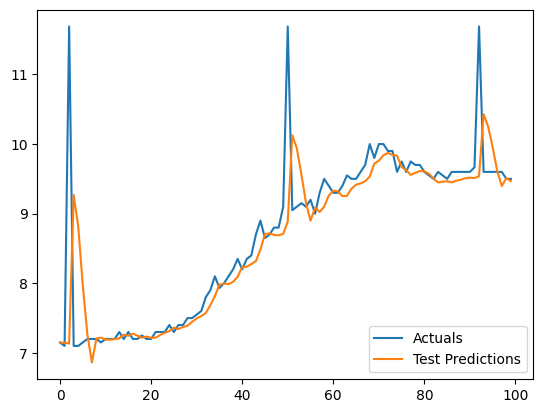

In [ ]:
plt.plot(test_results['Actuals'][:100], label='Actuals')
plt.plot(test_results['Test Predictions'][:100],label='Test Predictions' )

plt.legend()
plt.title('HOLDOUT LSTM MODEL 1')

In [ ]:
# Specify the path to the CSV file with station codes
csv_path = "/content/SantMateu22.csv"

val_df = pd.read_csv(csv_path)
val_df

,Timestamp,Sant Mateu
0,01/01/2021 00:00,6.15
1,01/01/2021 00:10,6.70
2,01/01/2021 00:20,6.85
3,01/01/2021 00:30,6.65
4,01/01/2021 00:40,6.55
...,...,...
21739,31/05/2021 23:10,17.75
21740,31/05/2021 23:20,17.80
21741,31/05/2021 23:30,17.70
21742,31/05/2021 23:40,16.45


In [ ]:
val_df.index = pd.to_datetime(val_df['Timestamp'], format= "%d/%m/%Y %H:%M")
val_df[:10]

,Timestamp,Sant Mateu
Timestamp,,
2021-01-01 00:00:00,01/01/2021 00:00,6.15
2021-01-01 00:10:00,01/01/2021 00:10,6.70
2021-01-01 00:20:00,01/01/2021 00:20,6.85
2021-01-01 00:30:00,01/01/2021 00:30,6.65
2021-01-01 00:40:00,01/01/2021 00:40,6.55
2021-01-01 00:50:00,01/01/2021 00:50,6.20
2021-01-01 01:00:00,01/01/2021 01:00,6.35
2021-01-01 01:10:00,01/01/2021 01:10,6.15
2021-01-01 01:20:00,01/01/2021 01:20,6.10


In [ ]:
val_df.tail()

,Timestamp,Sant Mateu
Timestamp,,
2021-05-31 23:10:00,31/05/2021 23:10,17.75
2021-05-31 23:20:00,31/05/2021 23:20,17.80
2021-05-31 23:30:00,31/05/2021 23:30,17.70
2021-05-31 23:40:00,31/05/2021 23:40,16.45
2021-05-31 23:50:00,31/05/2021 23:50,15.85


<Axes: xlabel='Timestamp'>

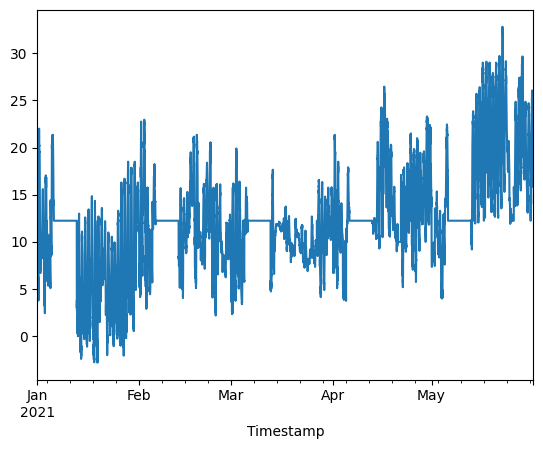

In [ ]:
val_df = val_df['Sant Mateu']
val_df.plot()

In [ ]:
WINDOW_SIZE = 5
X2, y2 = df_to_X_y(val_df, WINDOW_SIZE)
X2.shape, y2.shape

((21739, 5, 1), (21739,))

In [ ]:
X_New, y_New = X2[6000:15000], y2[6000:15000]
X_New.shape, y_New.shape

((9000, 5, 1), (9000,))

In [ ]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have already defined model1, X_New, and y_New

# Make predictions on the new data
train_predictions = model1.predict(X_New).flatten()

# Check for NaN values in y_New and train_predictions
nan_mask = np.isnan(y_New) | np.isnan(train_predictions)

# Remove rows with NaN values
y_New_cleaned = y_New[~nan_mask]
train_predictions_cleaned = train_predictions[~nan_mask]

# Check again for NaN values after removal
if np.isnan(y_New_cleaned).any() or np.isnan(train_predictions_cleaned).any():
    raise ValueError("NaN values still present after removal.")

# Calculate the Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(y_New_cleaned, train_predictions_cleaned))

# Create a DataFrame with the results
train_results1 = pd.DataFrame(data={'Train Predictions': train_predictions_cleaned, 'Actuals': y_New_cleaned, 'RMSE': [rmse] * len(y_New_cleaned)})

# Print or further analyze the results
print(train_results1)


282/282 [==============================] - 1s 3ms/step
      Train Predictions    Actuals     RMSE
0             12.142804  12.246618  0.50084
1             12.142804  12.246618  0.50084
2             12.142804  12.246618  0.50084
3             12.142804  12.246618  0.50084
4             12.142804  12.246618  0.50084
...                 ...        ...      ...
8995          10.220616  10.650000  0.50084
8996          10.374886  11.200000  0.50084
8997          10.725818  11.750000  0.50084
8998          11.171537  11.000000  0.50084
8999          11.187634  11.050000  0.50084

[9000 rows x 3 columns]


Text(0.5, 1.0, 'HOLDOUT LSTM MODEL 1')

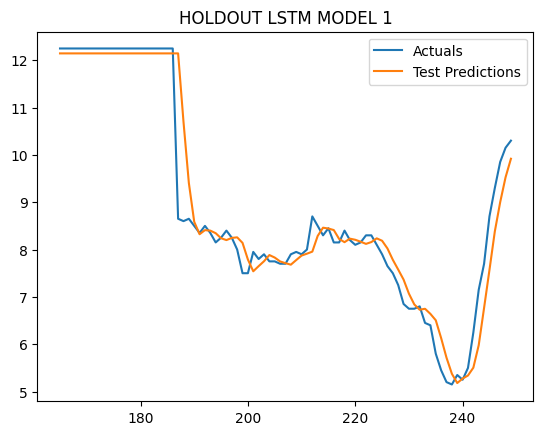

In [ ]:
plt.plot(train_results1['Actuals'][165:250], label='Actuals')
plt.plot(train_results1['Train Predictions'][165:250],label='Test Predictions' )

plt.legend()
plt.title('HOLDOUT LSTM MODEL 1')

In [ ]:
# Specify the path to the CSV file with station codes
csv_path = "/content/La jana la Pedrera22.csv"

val_df2 = pd.read_csv(csv_path)
val_df2

,Timestamp,la Jana - la Pedrera
0,01/01/2021 00:00,10.2
1,01/01/2021 00:10,10.1
2,01/01/2021 00:20,10.8
3,01/01/2021 00:30,11.3
4,01/01/2021 00:40,11.1
...,...,...
21739,31/05/2021 23:10,20.3
21740,31/05/2021 23:20,19.9
21741,31/05/2021 23:30,19.6
21742,31/05/2021 23:40,19.4


In [ ]:
val_df2.index = pd.to_datetime(val_df2['Timestamp'], format= "%d/%m/%Y %H:%M")
val_df2[:5]

,Timestamp,la Jana - la Pedrera
Timestamp,,
2021-01-01 00:00:00,01/01/2021 00:00,10.2
2021-01-01 00:10:00,01/01/2021 00:10,10.1
2021-01-01 00:20:00,01/01/2021 00:20,10.8
2021-01-01 00:30:00,01/01/2021 00:30,11.3
2021-01-01 00:40:00,01/01/2021 00:40,11.1


<Axes: xlabel='Timestamp'>

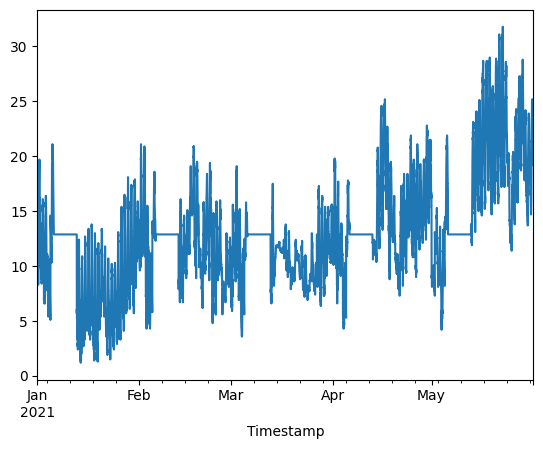

In [ ]:
val_df2 = val_df2['la Jana - la Pedrera']
val_df2.plot()

In [ ]:
WINDOW_SIZE = 5
X3, y3 = df_to_X_y(val_df2, WINDOW_SIZE)
X2.shape, y2.shape

((21739, 5, 1), (21739,))

In [ ]:
X_New2, y_New2 = X3[:8754], y3[:8754]
X_New2.shape, y_New2.shape

((8754, 5, 1), (8754,))

In [ ]:
# Check the data type of X_New2
print(X_New2.dtype)


float64


In [ ]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have already defined model1, X_New, and y_New

# Make predictions on the new data
train_predictions2 = model1.predict(X_New2).flatten()

# Check for NaN values in y_New and train_predictions
nan_mask = np.isnan(y_New2) | np.isnan(train_predictions2)

# Remove rows with NaN values
y_New_cleaned2 = y_New2[~nan_mask]
train_predictions_cleaned2 = train_predictions2[~nan_mask]

# Check again for NaN values after removal
if np.isnan(y_New_cleaned2).any() or np.isnan(train_predictions_cleaned2).any():
    raise ValueError("NaN values still present after removal.")

# Calculate the Root Mean Squared Error (RMSE)
rmse2 = sqrt(mean_squared_error(y_New_cleaned2, train_predictions_cleaned2))

# Create a DataFrame with the results
train_results2 = pd.DataFrame(data={'Train Predictions': train_predictions_cleaned2, 'Actuals': y_New_cleaned2, 'RMSE': [rmse2] * len(y_New_cleaned2)})

# Print or further analyze the results
print(train_results2)

274/274 [==============================] - 1s 4ms/step
      Train Predictions  Actuals      RMSE
0             10.964581     10.6  0.527251
1             10.848104     11.0  0.527251
2             10.791469     11.7  0.527251
3             11.062957     12.1  0.527251
4             11.531004     11.2  0.527251
...                 ...      ...       ...
8749          15.966561     15.5  0.527251
8750          15.777702     15.1  0.527251
8751          15.534221     14.9  0.527251
8752          15.288562     14.9  0.527251
8753          15.112578     14.4  0.527251

[8754 rows x 3 columns]


Text(0.5, 1.0, 'HOLDOUT LSTM MODEL 1')

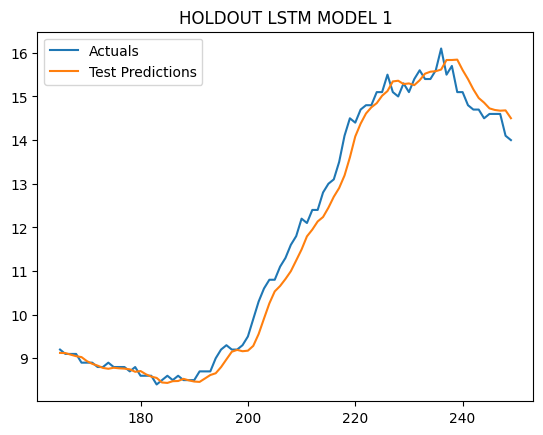

In [ ]:
plt.plot(train_results2['Actuals'][165:250], label='Actuals')
plt.plot(train_results2['Train Predictions'][165:250],label='Test Predictions' )

plt.legend()
plt.title('HOLDOUT LSTM MODEL 1')

In [ ]:
# Specify the path to the CSV file with station codes
csv_path = "/content/Castellon Bayanat22.csv"

val_df3 = pd.read_csv(csv_path)
val_df3

,Timestamp,Castelló de la Plana - IES Vicent Sos Baynat
0,01/01/2021 00:00,9.7
1,01/01/2021 00:10,9.5
2,01/01/2021 00:20,9.3
3,01/01/2021 00:30,9.3
4,01/01/2021 00:40,9.1
...,...,...
21739,31/05/2021 23:10,21.3
21740,31/05/2021 23:20,21.2
21741,31/05/2021 23:30,21.2
21742,31/05/2021 23:40,21.3


In [ ]:
val_df3.index = pd.to_datetime(val_df3['Timestamp'], format= "%d/%m/%Y %H:%M")
val_df3[:5]

,Timestamp,Castelló de la Plana - IES Vicent Sos Baynat
Timestamp,,
2021-01-01 00:00:00,01/01/2021 00:00,9.7
2021-01-01 00:10:00,01/01/2021 00:10,9.5
2021-01-01 00:20:00,01/01/2021 00:20,9.3
2021-01-01 00:30:00,01/01/2021 00:30,9.3
2021-01-01 00:40:00,01/01/2021 00:40,9.1


<Axes: xlabel='Timestamp'>

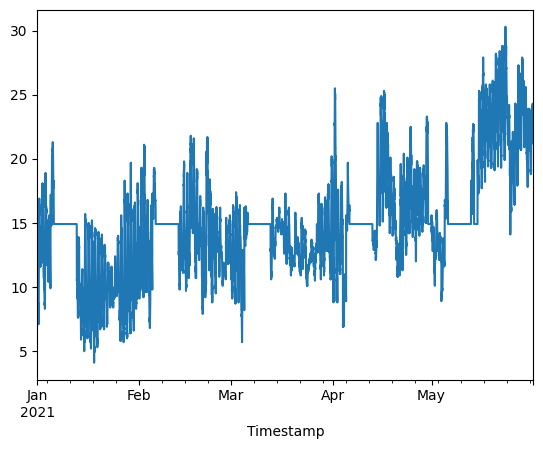

In [ ]:
val_df3 = val_df3['Castelló de la Plana - IES Vicent Sos Baynat']
val_df3.plot()

In [ ]:
WINDOW_SIZE = 5
X4, y4 = df_to_X_y(val_df3, WINDOW_SIZE)
X4.shape, y4.shape

((21739, 5, 1), (21739,))

In [ ]:
X_New3, y_New3 = X4[:8754], y4[:8754]
X_New3.shape, y_New3.shape

((8754, 5, 1), (8754,))

In [ ]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have already defined model1, X_New, and y_New

# Make predictions on the new data
train_predictions3 = model1.predict(X_New3).flatten()

# Check for NaN values in y_New and train_predictions
nan_mask = np.isnan(y_New3) | np.isnan(train_predictions3)

# Remove rows with NaN values
y_New_cleaned3 = y_New3[~nan_mask]
train_predictions_cleaned3 = train_predictions3[~nan_mask]

# Check again for NaN values after removal
if np.isnan(y_New_cleaned3).any() or np.isnan(train_predictions_cleaned3).any():
    raise ValueError("NaN values still present after removal.")

# Calculate the Root Mean Squared Error (RMSE)
rmse3 = sqrt(mean_squared_error(y_New_cleaned3, train_predictions_cleaned3))

# Create a DataFrame with the results
train_results3 = pd.DataFrame(data={'Train Predictions': train_predictions_cleaned3, 'Actuals': y_New_cleaned3, 'RMSE': [rmse3] * len(y_New_cleaned3)})

# Print or further analyze the results
print(train_results3)

274/274 [==============================] - 1s 5ms/step
      Train Predictions  Actuals      RMSE
0              9.117786      8.8  0.538178
1              8.921691      8.4  0.538178
2              8.613270      8.1  0.538178
3              8.269065      8.2  0.538178
4              8.125202      8.3  0.538178
...                 ...      ...       ...
8749          13.684291     13.3  0.538178
8750          13.478271     13.3  0.538178
8751          13.350343     13.3  0.538178
8752          13.279801     13.3  0.538178
8753          13.266153     13.2  0.538178

[8754 rows x 3 columns]


Text(0.5, 1.0, 'HOLDOUT LSTM MODEL 1')

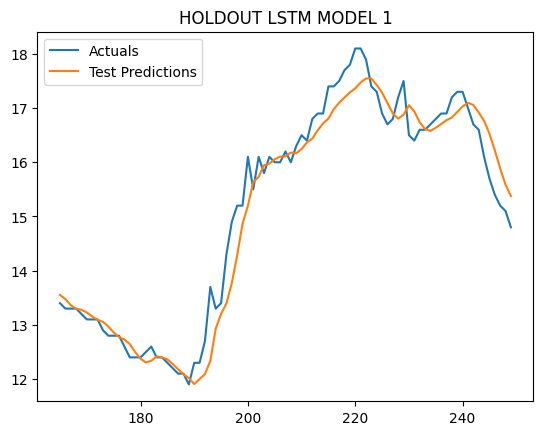

In [ ]:
plt.plot(train_results3['Actuals'][165:250], label='Actuals')
plt.plot(train_results3['Train Predictions'][165:250],label='Test Predictions' )

plt.legend()
plt.title('HOLDOUT LSTM MODEL 1')

In [ ]:
# Specify the path to the CSV file with station codes
csv_path = "/content/Forcall22.csv"

val_df4 = pd.read_csv(csv_path)
val_df4

,Timestamp,Forcall
0,01/01/2021 00:00,2.8
1,01/01/2021 00:10,2.3
2,01/01/2021 00:20,2.2
3,01/01/2021 00:30,2.4
4,01/01/2021 00:40,2.5
...,...,...
21739,31/05/2021 23:10,17.6
21740,31/05/2021 23:20,17.3
21741,31/05/2021 23:30,17.1
21742,31/05/2021 23:40,16.9


In [ ]:
val_df4.index = pd.to_datetime(val_df4['Timestamp'], format= "%d/%m/%Y %H:%M")
val_df4[:5]

,Timestamp,Forcall
Timestamp,,
2021-01-01 00:00:00,01/01/2021 00:00,2.8
2021-01-01 00:10:00,01/01/2021 00:10,2.3
2021-01-01 00:20:00,01/01/2021 00:20,2.2
2021-01-01 00:30:00,01/01/2021 00:30,2.4
2021-01-01 00:40:00,01/01/2021 00:40,2.5


<Axes: xlabel='Timestamp'>

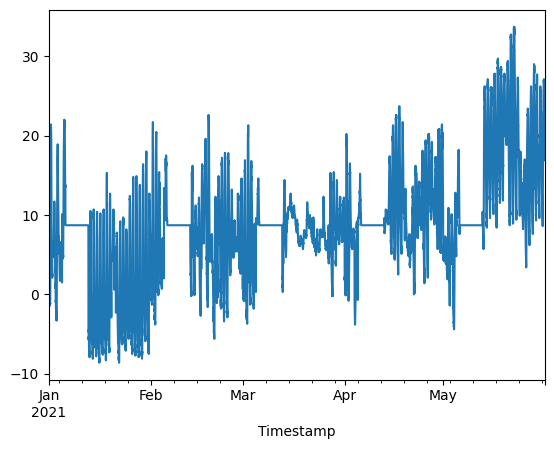

In [ ]:
val_df4 = val_df4['Forcall']
val_df4.plot()

In [ ]:
WINDOW_SIZE = 5
X5, y5 = df_to_X_y(val_df4, WINDOW_SIZE)
X5.shape, y5.shape

((21739, 5, 1), (21739,))

In [ ]:
X_New4, y_New4 = X5[:8754], y5[:8754]
X_New4.shape, y_New4.shape

((8754, 5, 1), (8754,))

In [ ]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have already defined model1, X_New, and y_New

# Make predictions on the new data
train_predictions4 = model1.predict(X_New4).flatten()

# Check for NaN values in y_New and train_predictions
nan_mask = np.isnan(y_New4) | np.isnan(train_predictions4)

# Remove rows with NaN values
y_New_cleaned4 = y_New4[~nan_mask]
train_predictions_cleaned4 = train_predictions4[~nan_mask]

# Check again for NaN values after removal
if np.isnan(y_New_cleaned4).any() or np.isnan(train_predictions_cleaned4).any():
    raise ValueError("NaN values still present after removal.")

# Calculate the Root Mean Squared Error (RMSE)
rmse4 = sqrt(mean_squared_error(y_New_cleaned4, train_predictions_cleaned4))

# Create a DataFrame with the results
train_results4 = pd.DataFrame(data={'Train Predictions': train_predictions_cleaned4, 'Actuals': y_New_cleaned4, 'RMSE': [rmse4] * len(y_New_cleaned4)})

# Print or further analyze the results
print(train_results4)

274/274 [==============================] - 1s 2ms/step
      Train Predictions  Actuals      RMSE
0              2.421840      2.3  2.327594
1              2.454133      1.9  2.327594
2              2.197856      1.8  2.327594
3              1.928983      1.7  2.327594
4              1.738705      2.0  2.327594
...                 ...      ...       ...
8749          14.045315     12.3  2.327594
8750          13.079495     11.8  2.327594
8751          12.296956     11.1  2.327594
8752          11.568607     10.3  2.327594
8753          10.818519      9.9  2.327594

[8754 rows x 3 columns]


Text(0.5, 1.0, 'HOLDOUT LSTM MODEL 1')

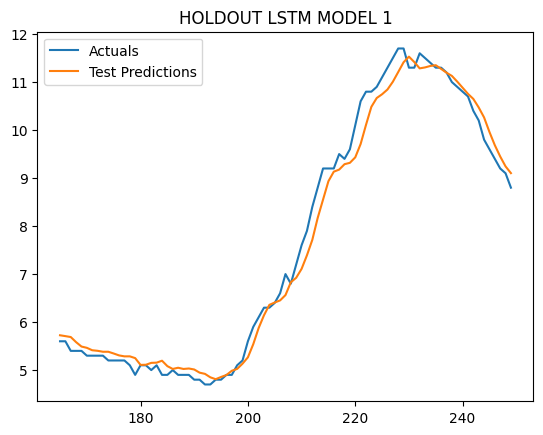

In [ ]:
plt.plot(train_results4['Actuals'][165:250], label='Actuals')
plt.plot(train_results4['Train Predictions'][165:250],label='Test Predictions' )

plt.legend()
plt.title('HOLDOUT LSTM MODEL 1')

In [ ]:
# Specify the path to the CSV file with station codes
csv_path = "/content/Xodos22.csv"

val_df5 = pd.read_csv(csv_path)
val_df5

,Timestamp,Xodos
0,01/01/2021 00:00,16.4
1,01/01/2021 00:10,16.7
2,01/01/2021 00:20,17.1
3,01/01/2021 00:30,17.2
4,01/01/2021 00:40,17.2
...,...,...
21739,31/05/2021 23:10,17.7
21740,31/05/2021 23:20,17.7
21741,31/05/2021 23:30,18.0
21742,31/05/2021 23:40,17.9


In [ ]:
val_df5.index = pd.to_datetime(val_df5['Timestamp'], format= "%d/%m/%Y %H:%M")
val_df5[:5]

,Timestamp,Xodos
Timestamp,,
2021-01-01 00:00:00,01/01/2021 00:00,16.4
2021-01-01 00:10:00,01/01/2021 00:10,16.7
2021-01-01 00:20:00,01/01/2021 00:20,17.1
2021-01-01 00:30:00,01/01/2021 00:30,17.2
2021-01-01 00:40:00,01/01/2021 00:40,17.2


<Axes: xlabel='Timestamp'>

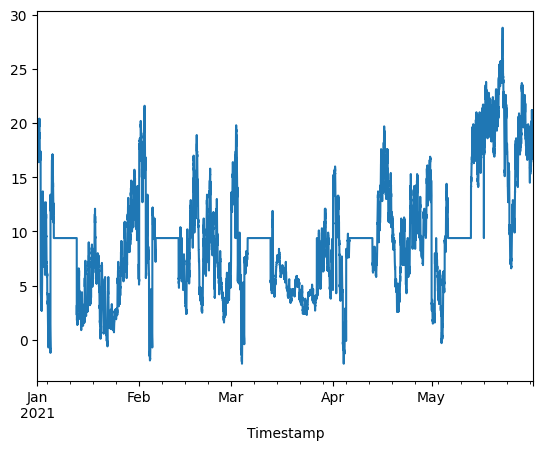

In [ ]:
val_df5 = val_df5['Xodos']
val_df5.plot()

In [ ]:
WINDOW_SIZE = 5
X6, y6 = df_to_X_y(val_df5, WINDOW_SIZE)
X6.shape, y6.shape

((21739, 5, 1), (21739,))

In [ ]:
X_New5, y_New5 = X6[:8754], y6[:8754]
X_New5.shape, y_New5.shape

((8754, 5, 1), (8754,))

In [ ]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have already defined model1, X_New, and y_New

# Make predictions on the new data
train_predictions5 = model1.predict(X_New5).flatten()

# Check for NaN values in y_New and train_predictions
nan_mask5 = np.isnan(y_New5) | np.isnan(train_predictions5)

# Remove rows with NaN values
y_New_cleaned5 = y_New5[~nan_mask5]
train_predictions_cleaned5 = train_predictions5[~nan_mask5]

# Check again for NaN values after removal
if np.isnan(y_New_cleaned5).any() or np.isnan(train_predictions_cleaned5).any():
    raise ValueError("NaN values still present after removal.")

# Calculate the Root Mean Squared Error (RMSE)
rmse5 = sqrt(mean_squared_error(y_New_cleaned5, train_predictions_cleaned5))

# Create a DataFrame with the results
train_results5 = pd.DataFrame(data={'Train Predictions': train_predictions_cleaned5, 'Actuals': y_New_cleaned5, 'RMSE': [rmse5] * len(y_New_cleaned5)})

# Print or further analyze the results
print(train_results5)

274/274 [==============================] - 1s 2ms/step
      Train Predictions  Actuals      RMSE
0             17.023844     17.1  0.590588
1             17.038460     16.9  0.590588
2             16.971603     17.2  0.590588
3             16.985533     17.4  0.590588
4             17.067352     17.2  0.590588
...                 ...      ...       ...
8749          15.081207     14.7  0.590588
8750          14.944144     14.3  0.590588
8751          14.697087     14.4  0.590588
8752          14.550429     14.6  0.590588
8753          14.549847     14.4  0.590588

[8754 rows x 3 columns]


Text(0.5, 1.0, 'HOLDOUT LSTM MODEL 1')

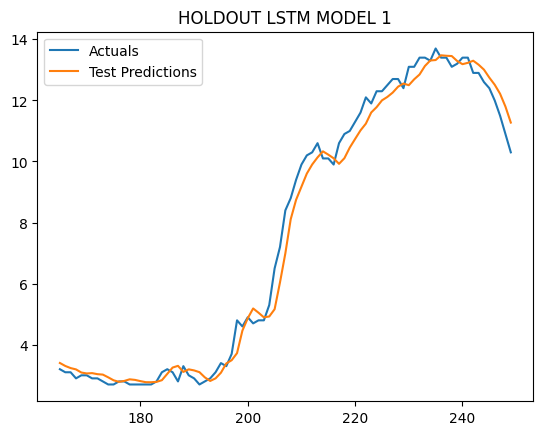

In [ ]:
plt.plot(train_results5['Actuals'][165:250], label='Actuals')
plt.plot(train_results5['Train Predictions'][165:250],label='Test Predictions' )

plt.legend()
plt.title('HOLDOUT LSTM MODEL 1')